## Specs

In [1]:
import numpy as np
import networkx as nx
import networkx.algorithms.community as nx_comm

G = nx.karate_club_graph()

print("Clsutering Coefficient: ", nx.average_clustering(G))
print("Average degree:", np.array(G.degree()).mean(axis=0)[-1])
degree = np.array([i for i in nx.degree_centrality(G).values()])
print("Average degree centrality: ", degree.mean())

Clsutering Coefficient:  0.5706384782076823
Average degree: 4.588235294117647
Average degree centrality:  0.1390374331550802


## Two communities

In [2]:
import numpy as np
import networkx as nx
import networkx.algorithms.community as nx_comm

G = nx.karate_club_graph()
result = nx_comm.louvain_communities(G, seed=None, resolution=0.5)

In [4]:

color_map = []
for node in G:
    if node in result[0]:
        color_map.append('blue')
    else:
        color_map.append('red')

nx.draw(G, node_color=color_map, with_labels=True)


TypeError: '_AxesStack' object is not callable

<Figure size 432x288 with 0 Axes>

## Four communities - Testing the effect of the initialization

Here we explicitly test different seeds.

In [73]:
import networkx as nx
from networkx.algorithms.community import louvain_communities, modularity
import numpy as np
from joblib import Parallel, delayed
G = nx.karate_club_graph()

def seed_run(seed=None, runs=100):
  communities_lcda = []
  results_lcda = []
  Ncomms = 0
  for i in range(runs):
    communities_lcda.append(louvain_communities(G, seed=seed, resolution=1))
    results_lcda.append(modularity(G,communities_lcda[i]))
    Ncomms += len(communities_lcda[i])/100
  results_lcda = np.array(results_lcda)
  return results_lcda.mean(), results_lcda.std()/np.sqrt(runs)

results = Parallel(n_jobs=4)(delayed(seed_run)(seed, runs=100) for seed in range(10000))

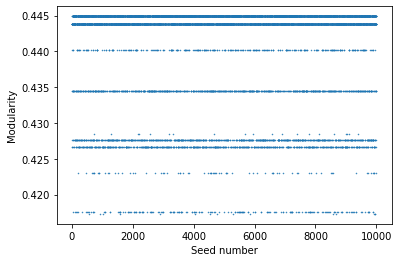

In [83]:
results_mod = np.array(results)[:,0]
target = 0.42
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(np.arange(0,10000), results_mod, 'o', markersize=0.5)
plt.xlabel("Seed number")
plt.ylabel("Modularity")
plt.savefig("./Multiple-seeds.svg", dpi=400)

In [76]:
np.mean(results_mod), np.std(results_mod)

(0.4401682445981147, 0.007304140075588857)

Here we test several runs with no seed specified. Virtually no difference at all.

In [92]:
import time
communities_lcda = []
results_lcda = []
Ncomms = 0
time_lcda = []
for i in range(10000):
  start = time.time()
  lcda = louvain_communities(G, seed=None, resolution=1)
  end = time.time()
  total_time = end - start

  time_lcda .append(total_time)
  communities_lcda.append(lcda)
  results_lcda.append(modularity(G,communities_lcda[i]))
  Ncomms += len(communities_lcda[i])/10000

results_lcda = np.array(results_lcda)
time_lcda = np.array(time_lcda)

In [94]:
print(f"Mean modularity of {results_lcda.mean()} with a standard deviation of {results_lcda.std()}")
print(f"LCDA took and average time of {time_lcda.mean()} seconds")
print(f"The mean number of communities is {Ncomms}")

0.44009508911002415 0.0073706532437036645 3.890199999999761
Mean modularity of 0.44009508911002415 with a standard deviation of 0.0073706532437036645
LCDA took and average time of 0.002340080189704895 seconds
The mean number of communities is 3.890199999999761


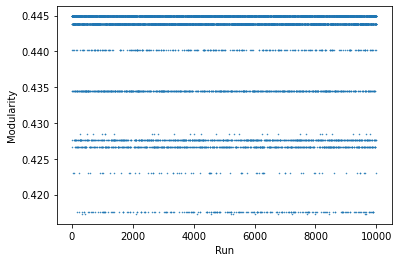

In [87]:
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(np.arange(0,10000), results_lcda, 'o', markersize=0.5)
plt.xlabel("Run")
plt.ylabel("Modularity")
plt.savefig("./Single-seed.svg", dpi=400)